<a href="https://colab.research.google.com/github/ajitjadhav10/DATA601/blob/main/Assignments/week_6__visualizing_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
#print('pandas',pandas.__version__)

In [7]:
df1 = pd.read_csv("RollingSystemDemand_20211013_1448.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)

df1.columns=['VD','time of measurement','value']

df1.head()

,VD,time of measurement,value
0,VD,20200201000000,25283
1,VD,20200201000500,25636
2,VD,20200201001000,25744
3,VD,20200201001500,25733
4,VD,20200201002000,25606


In [ ]:
df3 = pd.read_csv("RollingSystemDemand_03.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)

df3.columns=['VD','time of measurement','value']

df3.head()

,VD,time of measurement,value
0,VD,20211001000000,20565
1,VD,20211001000500,20904
2,VD,20211001001000,20985
3,VD,20211001001500,20863
4,VD,20211001002000,20730


In [17]:
df4 = pd.read_csv("RollingSystemDemand_04.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)

df4.columns=['VD','time of measurement','value']

df4.head()

,VD,time of measurement,value
0,VD,20211007000000,22929
1,VD,20211007000500,22904
2,VD,20211007001000,22945
3,VD,20211007001500,22921
4,VD,20211007002000,22911


In [18]:
df5 = pd.read_csv("RollingSystemDemand_05.csv",
                         index_col=False,
                         skiprows=1,
                         skipfooter=1,
                         engine='python',
                         header=None)

df5.columns=['VD','time of measurement','value']

df5.head()

,VD,time of measurement,value
0,VD,20211013000000,23965
1,VD,20211013000500,24012
2,VD,20211013001000,24218
3,VD,20211013001500,24285
4,VD,20211013002000,24163


In [41]:
df_6=df1.append(df3).append(df4).append(df5)
df_6.head()

,VD,time of measurement,value
0,VD,20210925000000,22153
1,VD,20210925000500,22208
2,VD,20210925001000,22138
3,VD,20210925001500,21994
4,VD,20210925002000,21905


In [42]:
df_6['time of measurement']=df_6['time of measurement'].apply(str)

In [27]:
import time

In [43]:
df_6['time of measurement']=pd.to_datetime(df_6['time of measurement'].astype(str),format='%Y%m%d%H%M%S')

In [44]:
df_6

,VD,time of measurement,value
0,VD,2021-09-25 00:00:00,22153
1,VD,2021-09-25 00:05:00,22208
2,VD,2021-09-25 00:10:00,22138
3,VD,2021-09-25 00:15:00,21994
4,VD,2021-09-25 00:20:00,21905
...,...,...,...
1677,VD,2021-10-18 19:45:00,33373
1678,VD,2021-10-18 19:50:00,33114
1679,VD,2021-10-18 19:55:00,32756
1680,VD,2021-10-18 20:00:00,32492


In [45]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6866 entries, 0 to 1681
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   VD                   6866 non-null   object        
 1   time of measurement  6866 non-null   datetime64[ns]
 2   value                6866 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 214.6+ KB


In [47]:
df_6['time of measurement']

0      2021-09-25 00:00:00
1      2021-09-25 00:05:00
2      2021-09-25 00:10:00
3      2021-09-25 00:15:00
4      2021-09-25 00:20:00
               ...        
1677   2021-10-18 19:45:00
1678   2021-10-18 19:50:00
1679   2021-10-18 19:55:00
1680   2021-10-18 20:00:00
1681   2021-10-18 20:05:00
Name: time of measurement, Length: 6866, dtype: datetime64[ns]

In [49]:
#extracting the hour from the date
df_6['time of measurement'].dt.hour

0        0
1        0
2        0
3        0
4        0
        ..
1677    19
1678    19
1679    19
1680    20
1681    20
Name: time of measurement, Length: 6866, dtype: int64

In [52]:
df_6['Hour']=df_6['time of measurement'].dt.hour
df_6

,VD,time of measurement,value,Hour
0,VD,2021-09-25 00:00:00,22153,0
1,VD,2021-09-25 00:05:00,22208,0
2,VD,2021-09-25 00:10:00,22138,0
3,VD,2021-09-25 00:15:00,21994,0
4,VD,2021-09-25 00:20:00,21905,0
...,...,...,...,...
1677,VD,2021-10-18 19:45:00,33373,19
1678,VD,2021-10-18 19:50:00,33114,19
1679,VD,2021-10-18 19:55:00,32756,19
1680,VD,2021-10-18 20:00:00,32492,20


In [64]:
df_6.groupby(['Hour'])['value'].mean()

Hour
0     22031.697917
1     21783.468750
2     21400.861111
3     21191.246528
4     21457.861111
5     24261.437500
6     28187.121528
7     30249.875000
8     30815.416667
9     30546.371528
10    29945.454861
11    29853.642361
12    29370.006944
13    29145.336806
14    29589.472222
15    31385.968750
16    33597.486111
17    34695.753472
18    34573.100694
19    32589.638889
20    29931.589928
21    26870.717391
22    24063.670290
23    22454.913043
Name: value, dtype: float64

In [65]:
df_7=df_6.groupby(['Hour'])['value'].mean()

In [66]:
df_7.head()

Hour
0    22031.697917
1    21783.468750
2    21400.861111
3    21191.246528
4    21457.861111
Name: value, dtype: float64

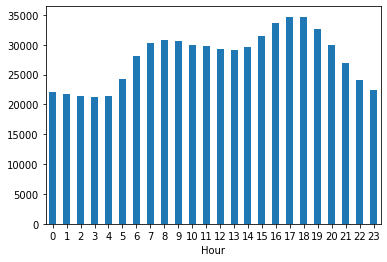

In [67]:
bx = df_7.plot.bar(x='Hour', y='value', rot=0)

In [68]:
df_6['Date']=df_6['time of measurement'].dt.date
df_6

,VD,time of measurement,value,Hour,Date
0,VD,2021-09-25 00:00:00,22153,0,2021-09-25
1,VD,2021-09-25 00:05:00,22208,0,2021-09-25
2,VD,2021-09-25 00:10:00,22138,0,2021-09-25
3,VD,2021-09-25 00:15:00,21994,0,2021-09-25
4,VD,2021-09-25 00:20:00,21905,0,2021-09-25
...,...,...,...,...,...
1677,VD,2021-10-18 19:45:00,33373,19,2021-10-18
1678,VD,2021-10-18 19:50:00,33114,19,2021-10-18
1679,VD,2021-10-18 19:55:00,32756,19,2021-10-18
1680,VD,2021-10-18 20:00:00,32492,20,2021-10-18


In [78]:
df_8=df_6.groupby(['Date'])['value'].mean()
df_8

Date
2021-09-25    25942.215278
2021-09-26    23953.541667
2021-09-27    26019.621528
2021-09-28    28245.461806
2021-09-29    27187.184028
2021-09-30    28387.843750
2021-10-01    26343.958333
2021-10-02    26784.152778
2021-10-03    24751.277778
2021-10-04    29110.017361
2021-10-05    28639.927083
2021-10-06    29343.645833
2021-10-07    29201.315972
2021-10-08    29298.406250
2021-10-09    26277.850694
2021-10-10    25647.170139
2021-10-11    29135.687500
2021-10-12    30749.170139
2021-10-13    30592.444444
2021-10-14    29355.118056
2021-10-15    30197.364583
2021-10-16    27570.041667
2021-10-17    26969.565972
2021-10-18    31170.582645
Name: value, dtype: float64

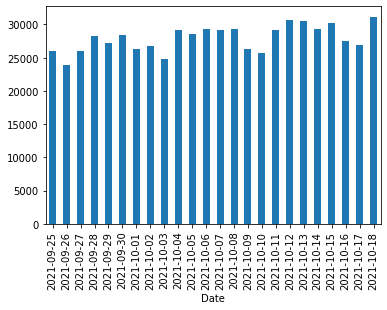

In [79]:
cx = df_8.plot.bar(x='Dour', y='value', rot=90)